# Predicting 10 year risk of Coronary Heart Disease

In [1]:
# import libraries for data cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Exploratory Data Analysis & Data Cleaning

In [2]:
# import dataframe
df = pd.read_csv("train.csv")
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [3]:
# quick EDA to get overview
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title = 'TenYearCHD Data Report')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


%|          | 0/17 [00:00<?, ?it/s]
100%|██████████| 17/17 [00:00<00:00, 109.11it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
# statistical summary of numerical data
df.describe()

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

In [4]:
# statistical summary of categorical data
df.describe(include = 'object')

sex is_smoking
count   3390       3390
unique     2          2
top        F         NO
freq    1923       1703

In [5]:
# summarize null values
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [3]:
# create binary feature to show missing glucose values 
df['glucose_missing'] = df['glucose'].isnull().astype(int)

In [4]:
# fill empty cells of numerical column with median
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

df[['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']] = imputer.fit_transform(df[['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']])
df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
glucose_missing    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
 17  glucose_missin

In [6]:
# check if all columns with dtype float contain decimals
float_cols = df.select_dtypes(include=['float'])

for col in float_cols:
    all_whole = (df[col] % 1 == 0).all()
    print(f"{col}: {'All whole numbers' if all_whole else 'Contains decimals'}")

education: All whole numbers
cigsPerDay: All whole numbers
BPMeds: All whole numbers
totChol: All whole numbers
sysBP: Contains decimals
diaBP: Contains decimals
BMI: Contains decimals
heartRate: All whole numbers
glucose: All whole numbers


In [7]:
# convert float to int
df[['education', 'cigsPerDay', 'BPMeds', 'totChol', 'heartRate', 'glucose']] = df[['education', 'cigsPerDay', 'BPMeds', 'totChol', 'heartRate', 'glucose']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   int32  
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3390 non-null   int32  
 6   BPMeds           3390 non-null   int32  
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   int32  
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   int32  
 15  glucose          3390 non-null   int32  
 16  TenYearCHD       3390 non-null   int64  
 17  glucose_missin

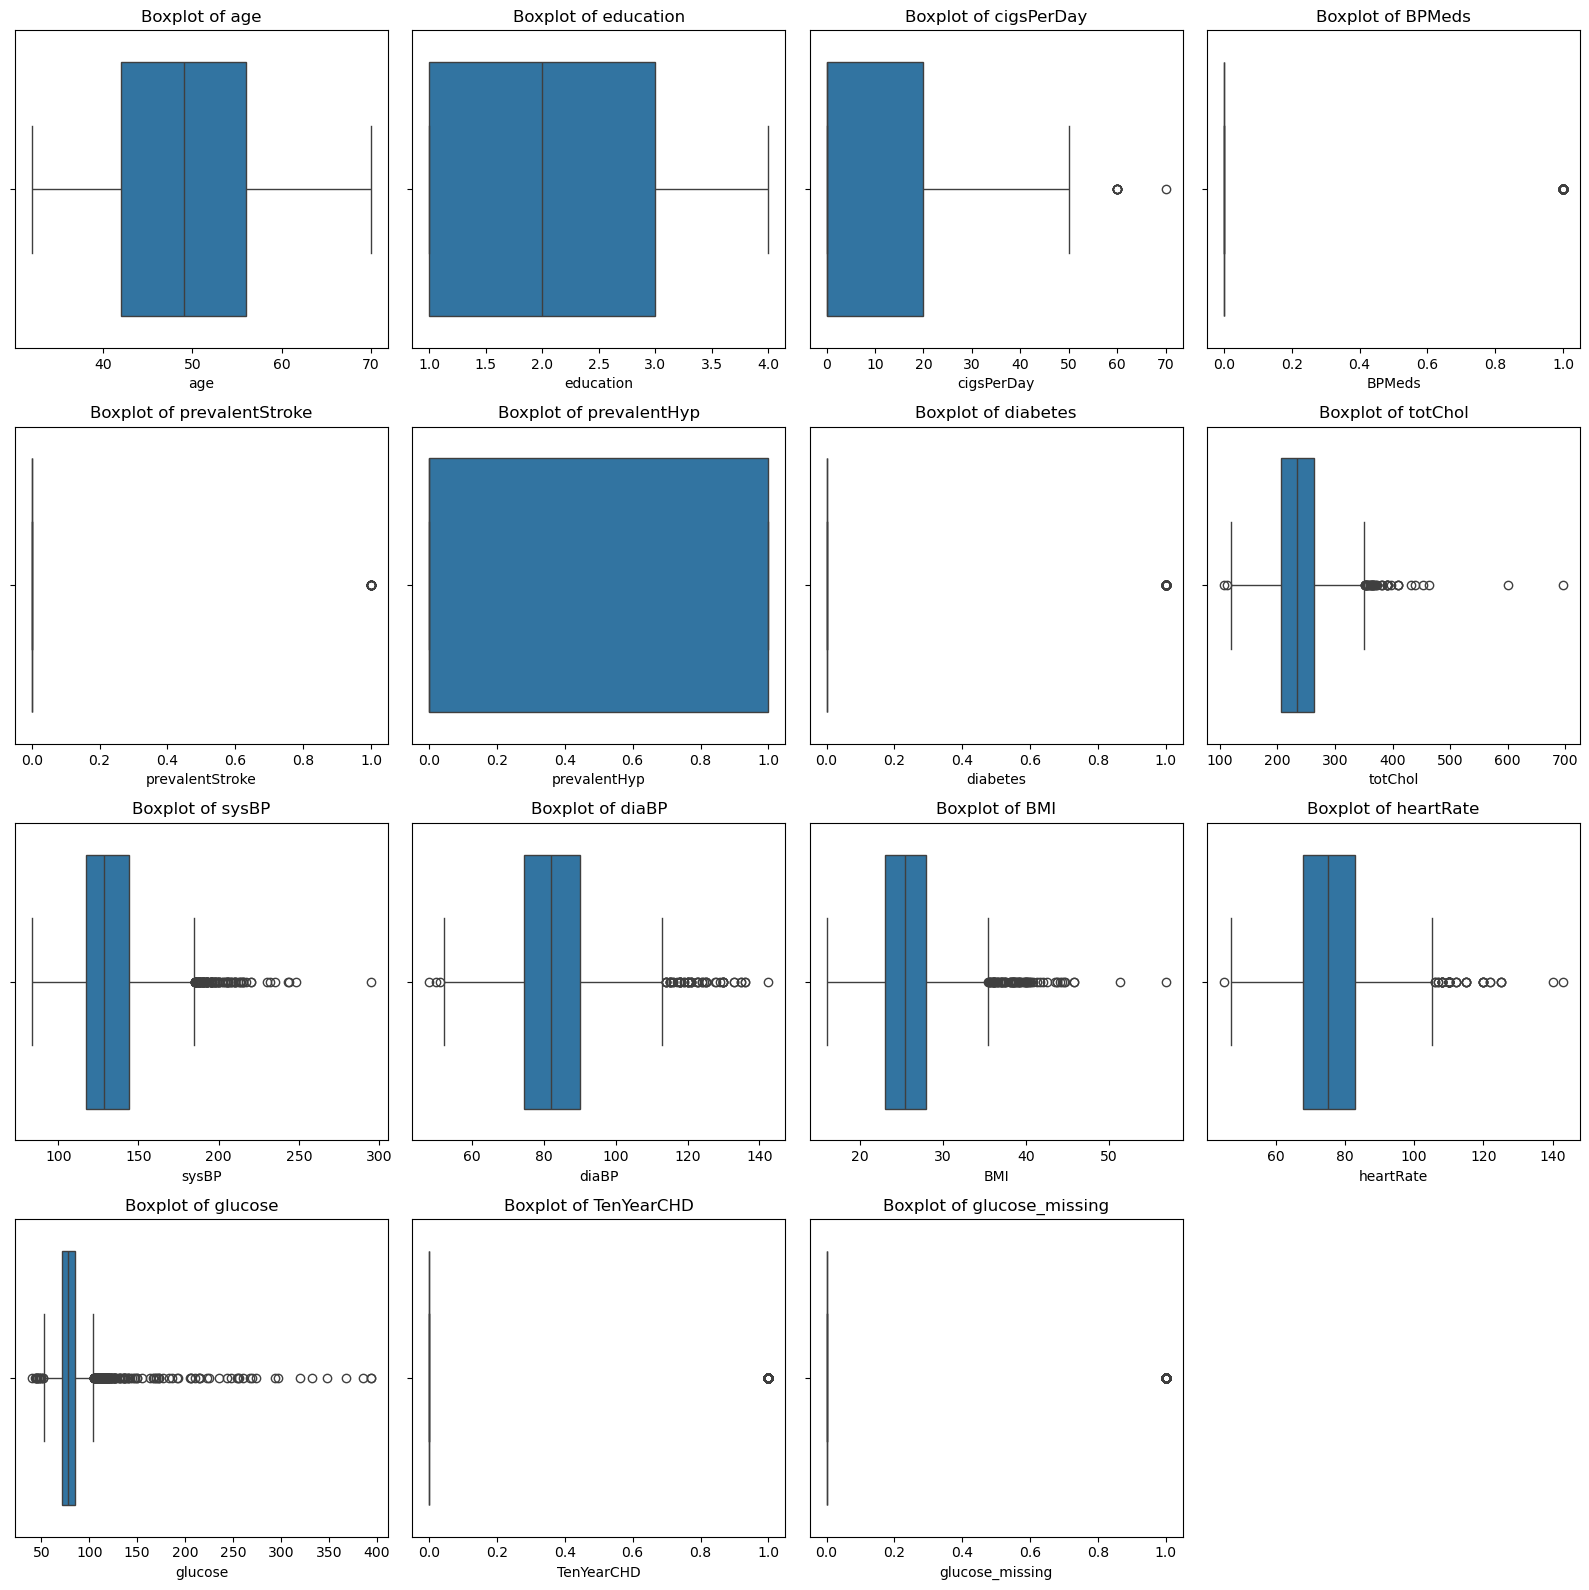

In [8]:
# check for outliers
num_cols = df[[
     'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'glucose_missing'
]]

# Plot boxplots in a loop
plt.figure(figsize=(4 * 4, 4 * 4))
for idx, col in enumerate(num_cols):
    plt.subplot(4, 4, idx + 1)
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    
plt.show()

### All outliers are retained as they represent valid cases
- Outliers representing meaningful minority groups are left unscaled.
- Outliers representing other rare but valid cases are scaled.

In [13]:
# export cleaned data
df.to_csv("cleaned_train_data.csv", index=False)

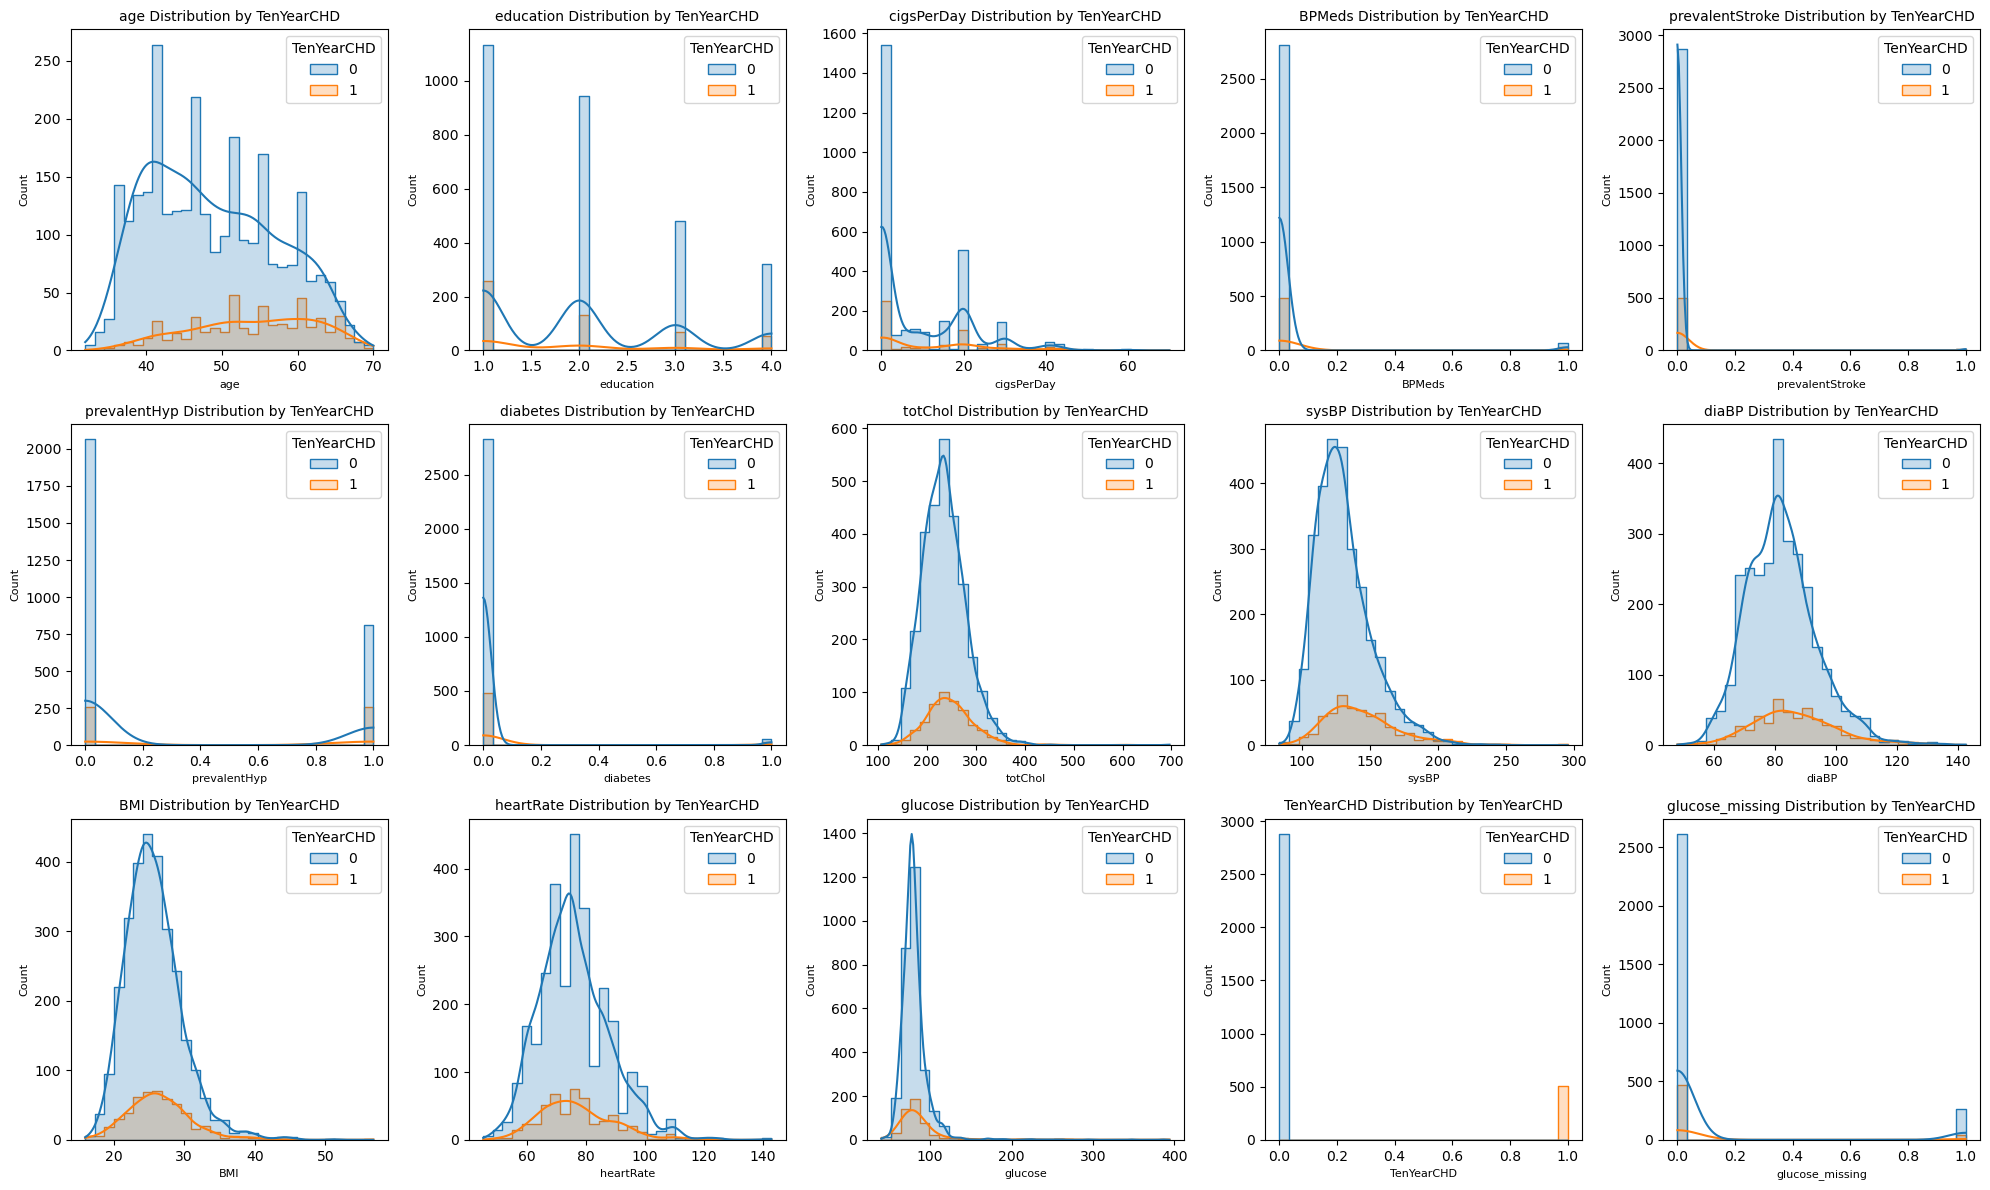

In [9]:
# numerical 
plt.figure(figsize=(20, 12))

for i, col in enumerate(num_cols):
    plt.subplot(3, 5, i + 1)  
    sns.histplot(data=df, x=col, hue='TenYearCHD', kde=True, bins=30, element="step")
    plt.title(f'{col} Distribution by TenYearCHD', fontsize=10)
    plt.xlabel(col, fontsize=8)
    plt.ylabel('Count', fontsize=8)

plt.tight_layout()
plt.show()

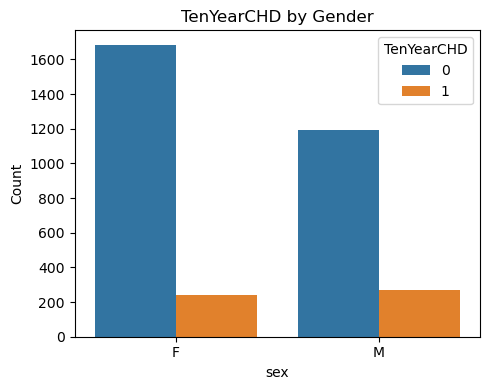

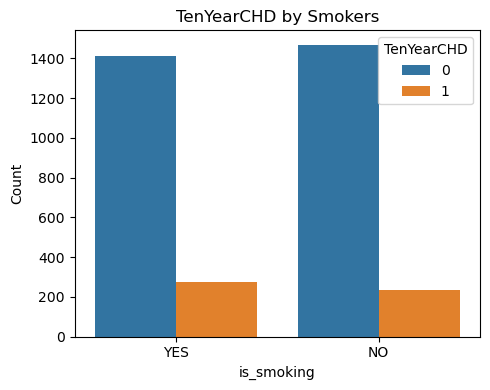

In [10]:
# categorical
plt.figure(figsize=(5,4))

# Grouped bar plot
sns.countplot(x='sex', hue='TenYearCHD', data=df)

plt.title('TenYearCHD by Gender')
plt.xlabel('sex')
plt.ylabel('Count')
plt.legend(title='TenYearCHD')
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,4))

# Grouped bar plot
sns.countplot(x='is_smoking', hue='TenYearCHD', data=df)

plt.title('TenYearCHD by Smokers')
plt.xlabel('is_smoking')
plt.ylabel('Count')
plt.legend(title='TenYearCHD')
plt.tight_layout()
plt.show()

## SPLIT DATA

In [11]:
# import libraries
from sklearn.model_selection import train_test_split

In [12]:
X = df[['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'glucose_missing']]
y = df['TenYearCHD']

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 42 )

## DATA PREPROCESSING 

In [13]:
# import more libraries
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder

In [14]:
# Initialize 
rs = RobustScaler()
ss = StandardScaler()
ohe = OneHotEncoder(sparse_output=False)

In [15]:
# Group columns
robust_cols = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
standard_cols = ['age', 'education']
one_hot_cols = ['sex', 'is_smoking']
no_scale_cols = ['BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'glucose_missing']

In [16]:
# Fit and transform train data
X_train_rs = rs.fit_transform(X_train[robust_cols])
X_train_ss = ss.fit_transform(X_train[standard_cols])
X_train_ohe = ohe.fit_transform(X_train[one_hot_cols])
X_train_no_scale = X_train[no_scale_cols].values

# Transform test data
X_test_rs = rs.transform(X_test[robust_cols])
X_test_ss = ss.transform(X_test[standard_cols])
X_test_ohe = ohe.transform(X_test[one_hot_cols])
X_test_no_scale = X_test[no_scale_cols].values

# Recombine
X_train_processed = np.hstack([X_train_rs, X_train_ss, X_train_ohe, X_train_no_scale])
X_test_processed = np.hstack([X_test_rs, X_test_ss, X_test_ohe, X_test_no_scale])

## BASELINE EVALUATION

In [17]:
# import libraries
from xgboost import XGBClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

<-------Logistic Regression------>
report: 
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       576
           1       0.71      0.05      0.09       102

    accuracy                           0.85       678
   macro avg       0.78      0.52      0.51       678
weighted avg       0.83      0.85      0.80       678

matrix: 
 [[574   2]
 [ 97   5]]


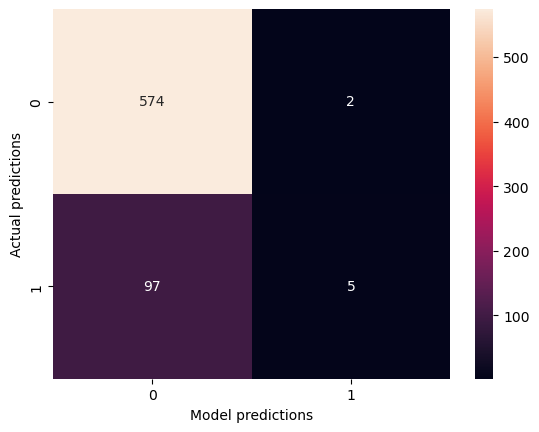

<-------SGD Classifiers------>
report: 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       576
           1       0.00      0.00      0.00       102

    accuracy                           0.85       678
   macro avg       0.42      0.50      0.46       678
weighted avg       0.72      0.85      0.78       678

matrix: 
 [[576   0]
 [102   0]]


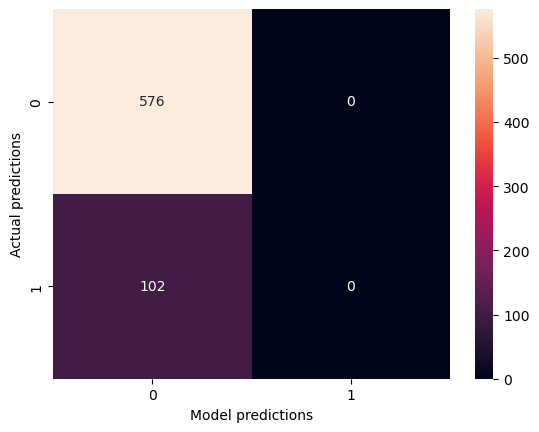

<-------Decision Tree------>
report: 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       576
           1       0.24      0.25      0.25       102

    accuracy                           0.77       678
   macro avg       0.55      0.56      0.55       678
weighted avg       0.77      0.77      0.77       678

matrix: 
 [[494  82]
 [ 76  26]]


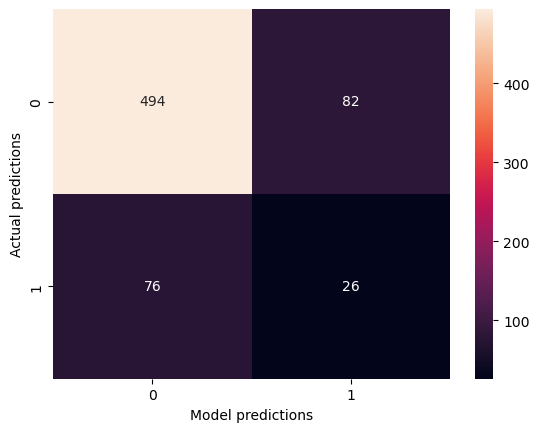

<-------Random Forest------>
report: 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       576
           1       0.46      0.06      0.10       102

    accuracy                           0.85       678
   macro avg       0.66      0.52      0.51       678
weighted avg       0.80      0.85      0.79       678

matrix: 
 [[569   7]
 [ 96   6]]


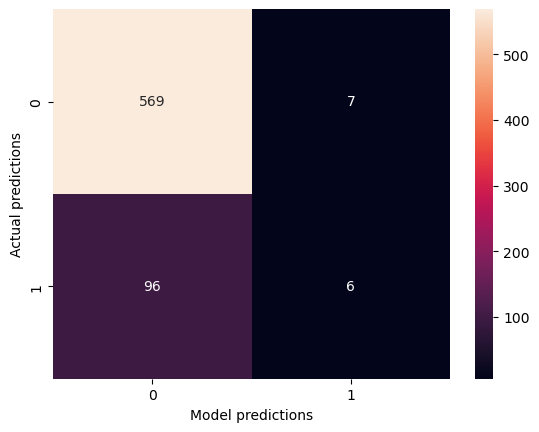

<-------XG Boost------>
report: 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       576
           1       0.24      0.09      0.13       102

    accuracy                           0.82       678
   macro avg       0.55      0.52      0.51       678
weighted avg       0.76      0.82      0.78       678

matrix: 
 [[547  29]
 [ 93   9]]


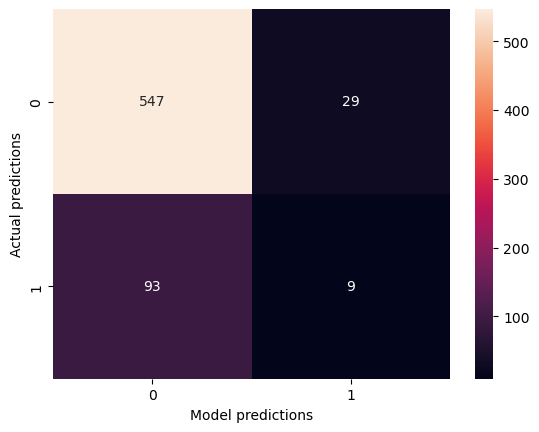

In [18]:
# initialize and train the models
classifiers = [[LogisticRegression(random_state=42), 'Logistic Regression'],
               [SGDClassifier(random_state=42), 'SGD Classifiers'],
               [DecisionTreeClassifier(random_state=42), 'Decision Tree'],
               [RandomForestClassifier(random_state=42), 'Random Forest'],
               [XGBClassifier(random_state=42), 'XG Boost']
]

for classifier in classifiers:
    model = classifier[0]
    model_name = classifier[1]
    print(f"<-------{model_name}------>")

    model.fit(X_train_processed, y_train)
    predictions = model.predict(X_test_processed)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print(f"report: \n", report)
    print("matrix: \n", matrix)
    sns.heatmap(matrix, annot = True, fmt = "g")
    plt.ylabel("Actual predictions")
    plt.xlabel("Model predictions")
    plt.show()

### Logistic Regression is the best

## HYPERPARAMETER TUNING

In [19]:
# import libraries
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from scipy.stats import uniform, randint

In [20]:
model = LogisticRegression(random_state = 42)

In [21]:
# use of skf for cv since class is unbalanced
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train_processed, y_train, cv=skf, scoring='f1')

print("Stratified f1 scores:", scores)

Stratified f1 scores: [0.12903226 0.14736842 0.20833333 0.11111111 0.11235955]


In [22]:
# RandomSearch for broad exploration
random_param = {
    'C': uniform(loc=0.0001, scale=100), 
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  
    'max_iter': [100, 200, 500],
    'class_weight': [None, 'balanced']
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=random_param,
    n_iter=30,
    scoring='f1',
    cv=skf,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_processed, y_train)

print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'C': 33.37096111390219, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}


In [23]:
# Fine-tuning with GridSearch
best_C = random_search.best_params_['C']

grid_params = {
    'C': [best_C * 0.5, best_C, best_C * 1.5],
    'penalty': [random_search.best_params_['penalty']],
    'solver': ['liblinear'],
    'max_iter': [random_search.best_params_['max_iter']],
    'class_weight': [random_search.best_params_['class_weight']]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=grid_params,
    scoring='f1',
    cv=skf,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_processed, y_train)

print("Best parameters from GridSearchCV:")
print(grid_search.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters from GridSearchCV:
{'C': 16.685480556951095, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}


## MODEL EVALUATION

In [24]:
# Retrieve best estimator
best_model = grid_search.best_estimator_
# Get predicted probabilities for positive class (class=1)
probs = best_model.predict_proba(X_test_processed)[:, 1]

# Default threshold is 0.5
default_preds = (probs >= 0.5).astype(int)

In [25]:
from sklearn.metrics import precision_recall_curve

In [26]:
precisions, recalls, thresholds = precision_recall_curve(y_test, probs)

# Calculate F1 scores for all thresholds
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

# Find the threshold with highest F1 score
best_idx = f1_scores.argmax()
best_threshold = thresholds[best_idx]
best_preds = (probs >= best_threshold).astype(int)

Classification report with default threshold 0.5:
              precision    recall  f1-score   support

           0       0.92      0.72      0.81       576
           1       0.29      0.66      0.41       102

    accuracy                           0.71       678
   macro avg       0.61      0.69      0.61       678
weighted avg       0.83      0.71      0.75       678

[[415 161]
 [ 35  67]]

Classification report with custom threshold 0.5103480228214647:
              precision    recall  f1-score   support

           0       0.92      0.73      0.82       576
           1       0.30      0.65      0.41       102

    accuracy                           0.72       678
   macro avg       0.61      0.69      0.61       678
weighted avg       0.83      0.72      0.75       678

[[421 155]
 [ 36  66]]


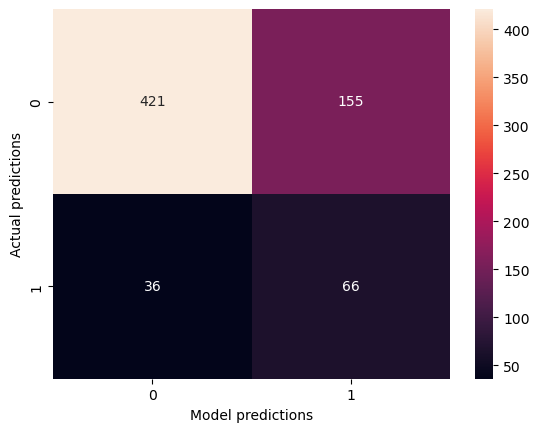

In [27]:
print("Classification report with default threshold 0.5:")
print(classification_report(y_test, default_preds))
print(confusion_matrix(y_test, default_preds))

print(f"\nClassification report with custom threshold {best_threshold}:")
print(classification_report(y_test, best_preds))
print(confusion_matrix(y_test, best_preds))


matrix = confusion_matrix(y_test, best_preds)


sns.heatmap(matrix, annot = True, fmt = "g")
plt.ylabel("Actual predictions")
plt.xlabel("Model predictions")
plt.show()

## FURTHER TUNING

In [28]:
feature_importance = best_model.coef_[0]
feature_importance

array([ 0.40601469,  0.16873126,  0.37448194,  0.05032337,  0.00742925,
       -0.07829997,  0.07428162,  0.50702638, -0.00328014, -0.3802013 ,
        0.0681646 , -0.27474133, -0.03729537,  0.06721913,  0.70404494,
        0.22275607,  0.37395109,  0.26533823])

In [29]:
ohe_feature_names = ohe.get_feature_names_out(one_hot_cols)  

feature_name = robust_cols + standard_cols + list(ohe_feature_names) + no_scale_cols
feature_name

['cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'age',
 'education',
 'sex_F',
 'sex_M',
 'is_smoking_NO',
 'is_smoking_YES',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'glucose_missing']

In [30]:
feature_importance_df = pd.DataFrame({
    'Features': feature_name, 
    'Importances': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by = 'Importances', ascending = False)
feature_importance_df

Features  Importances
14  prevalentStroke     0.704045
7               age     0.507026
0        cigsPerDay     0.406015
2             sysBP     0.374482
16         diabetes     0.373951
17  glucose_missing     0.265338
15     prevalentHyp     0.222756
1           totChol     0.168731
6           glucose     0.074282
10            sex_M     0.068165
13           BPMeds     0.067219
3             diaBP     0.050323
4               BMI     0.007429
8         education    -0.003280
12   is_smoking_YES    -0.037295
5         heartRate    -0.078300
11    is_smoking_NO    -0.274741
9             sex_F    -0.380201

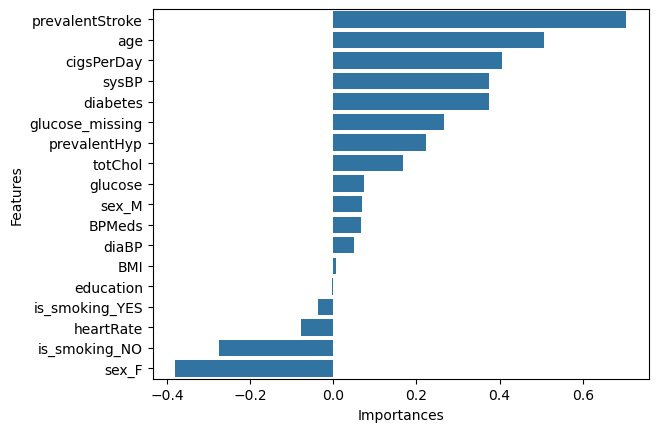

In [31]:
sns.barplot(x = 'Importances', y='Features', data= feature_importance_df)
plt.show()

In [32]:
# Select top features
top13 = feature_importance_df[:13]
top_features = top13['Features'].values

# Find indices of top features in feature_names list
top_indices = [feature_name.index(f) for f in top_features]

# Store top features from train and test data
X_train_top13 = X_train_processed[:, top_indices]
X_test_top13 = X_test_processed[:, top_indices]

In [33]:
X_test_top13.shape

(678, 13)

In [34]:
# Perform fitting and training again
random_search.fit(X_train_top13, y_train)
grid_search.fit(X_train_top13, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [16.685480556951095, 33.37096111390219,
                               50.05644167085329],
                         'class_weight': ['balanced'], 'max_iter': [500],
                         'penalty': ['l2'], 'solver': ['liblinear']},
             scoring='f1', verbose=1)

In [35]:
# perform evaluation again
best_model = grid_search.best_estimator_

probs = best_model.predict_proba(X_test_top13)[:, 1]
default_preds = (probs >= 0.5).astype(int)

precisions, recalls, thresholds = precision_recall_curve(y_test, probs)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

best_idx = f1_scores.argmax()
best_threshold = thresholds[best_idx]
best_preds = (probs >= best_threshold).astype(int)

Classification report with default threshold 0.5:
              precision    recall  f1-score   support

           0       0.92      0.72      0.81       576
           1       0.29      0.66      0.40       102

    accuracy                           0.71       678
   macro avg       0.61      0.69      0.60       678
weighted avg       0.83      0.71      0.74       678

[[412 164]
 [ 35  67]]

Classification report with custom threshold 0.5295985704493772:
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       576
           1       0.31      0.60      0.41       102

    accuracy                           0.74       678
   macro avg       0.61      0.68      0.62       678
weighted avg       0.82      0.74      0.77       678

[[443 133]
 [ 41  61]]


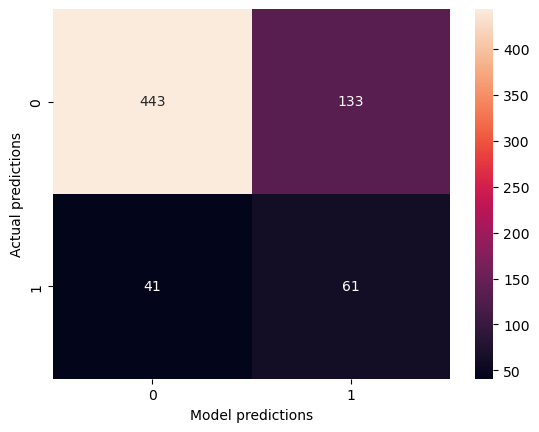

In [36]:
print("Classification report with default threshold 0.5:")
print(classification_report(y_test, default_preds))
print(confusion_matrix(y_test, default_preds))

print(f"\nClassification report with custom threshold {best_threshold}:")
print(classification_report(y_test, best_preds))
print(confusion_matrix(y_test, best_preds))


matrix = confusion_matrix(y_test, best_preds)


sns.heatmap(matrix, annot = True, fmt = "g")
plt.ylabel("Actual predictions")
plt.xlabel("Model predictions")
plt.show()

In [37]:
import shap

In [38]:
X_train_top13 = X_train_top13.astype(np.float64)
X_test_top13 = X_test_top13.astype(np.float64)

X_train_top13 = pd.DataFrame(X_train_top13, columns=top_features)
X_test_top13= pd.DataFrame(X_test_top13, columns=top_features)

In [39]:
X_test_top13.shape

(678, 13)

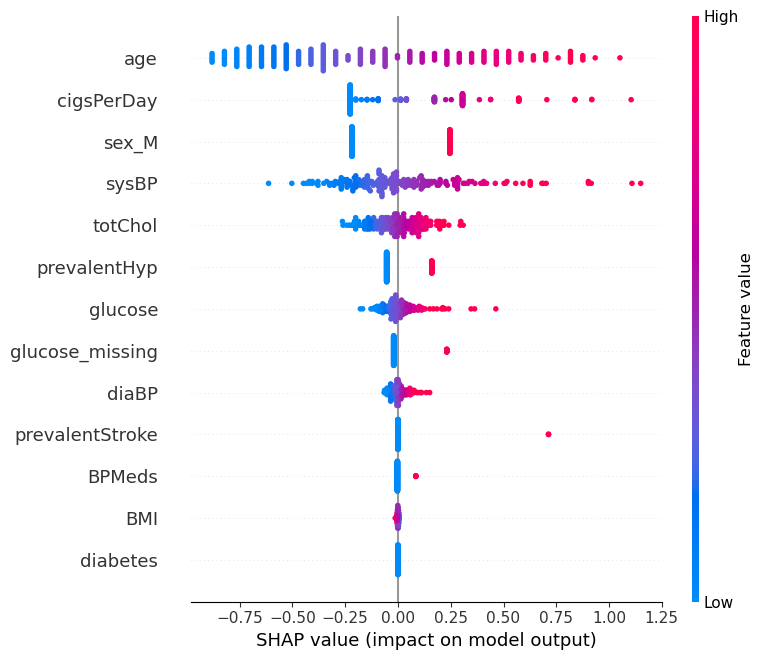

In [40]:
# Initialize SHAP 
background = X_train_top13.sample(n=100, random_state=42)
explainer = shap.LinearExplainer(best_model, background)

X_test_sample = X_test_top13.sample(n=200, random_state=42)

# Compute SHAP values
shap_values = explainer.shap_values(X_test_sample)
shap.summary_plot(shap_values, X_test_sample)

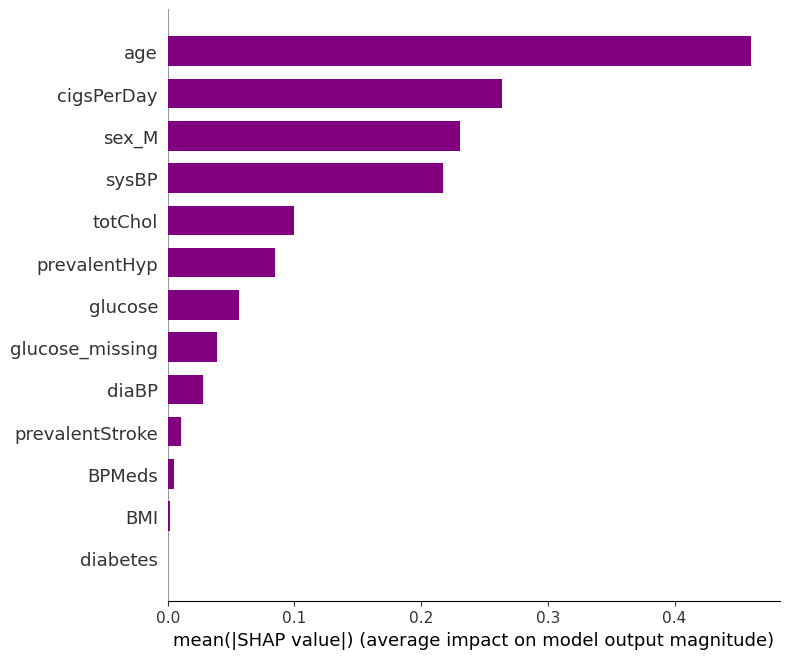

In [47]:
shap.summary_plot(shap_values, X_test_sample, plot_type="bar", color='purple')

In [44]:
if isinstance(shap_values, list):
    shap_vals = shap_values[1]
else:
    shap_vals = shap_values

mean_shap = np.mean(shap_vals, axis=0)
shap_importance_df = pd.DataFrame({
    'feature': top_features,
    'mean_shap_value': mean_shap
}).sort_values(by='mean_shap_value', ascending=False)

print(shap_importance_df)

            feature  mean_shap_value
2        cigsPerDay         0.028482
3             sysBP         0.022342
0   prevalentStroke         0.010697
6      prevalentHyp         0.009616
8           glucose         0.006112
5   glucose_missing         0.002514
11            diaBP         0.001877
4          diabetes         0.000000
10           BPMeds         0.000000
12              BMI        -0.000292
7           totChol        -0.004981
9             sex_M        -0.011600
1               age        -0.134054


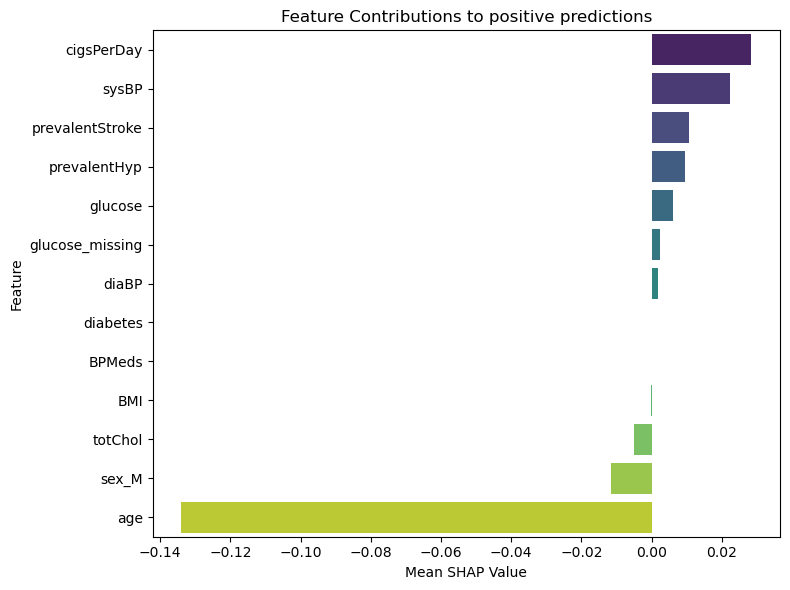

In [45]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data=shap_importance_df,
    x='mean_shap_value',
    y='feature',
    palette='viridis'
)

plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Feature Contributions to positive predictions')
plt.tight_layout()
plt.show()
